# Generative AI playground
Quick start: pip install -q -U google-genai


## import stuff

In [31]:
import config
from google import genai
from google.genai import types
# import google.generativeai as genai

# Rest of your code remains the same



## Connect to gemini
only need to do this once

In [7]:
client = genai.Client(api_key=config.apikey)

## Code base: basic text generation

In [9]:

response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents="Discuss differences and similarity between Pikachu and Lord Voldermort in less than 100 words",
)

print(response.text)

Pikachu and Lord Voldemort are polar opposites. Pikachu is a cute, electric mouse known for its loyalty and positive nature. Voldemort is a malevolent wizard consumed by fear and a lust for power.

A similarity, albeit a weak one, is their iconic status. Both are instantly recognizable figures within their respective fictional universes and beyond, having deeply impacted popular culture. But beyond this, their motivations, actions, and overall impact are drastically different.



## Image input

We will use Pillow library to deal with image data.

In [10]:
from PIL import Image
from IPython.display import display

### local image input

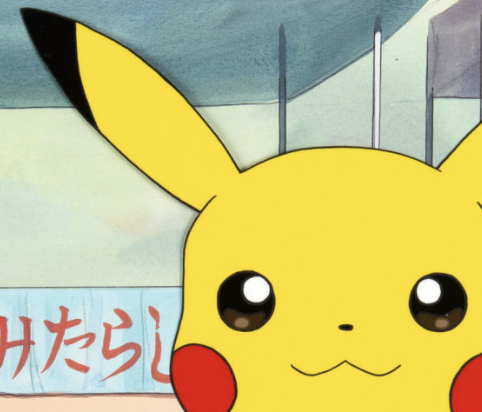

In [11]:
image = Image.open('./img1.png')

# Display the image inline in the notebook
display(image)


In [12]:
client = genai.Client(api_key=config.apikey)
response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents=["What is this image?", image])

print(response.text)

The image is a close-up of the Pokémon Pikachu.


### Public image

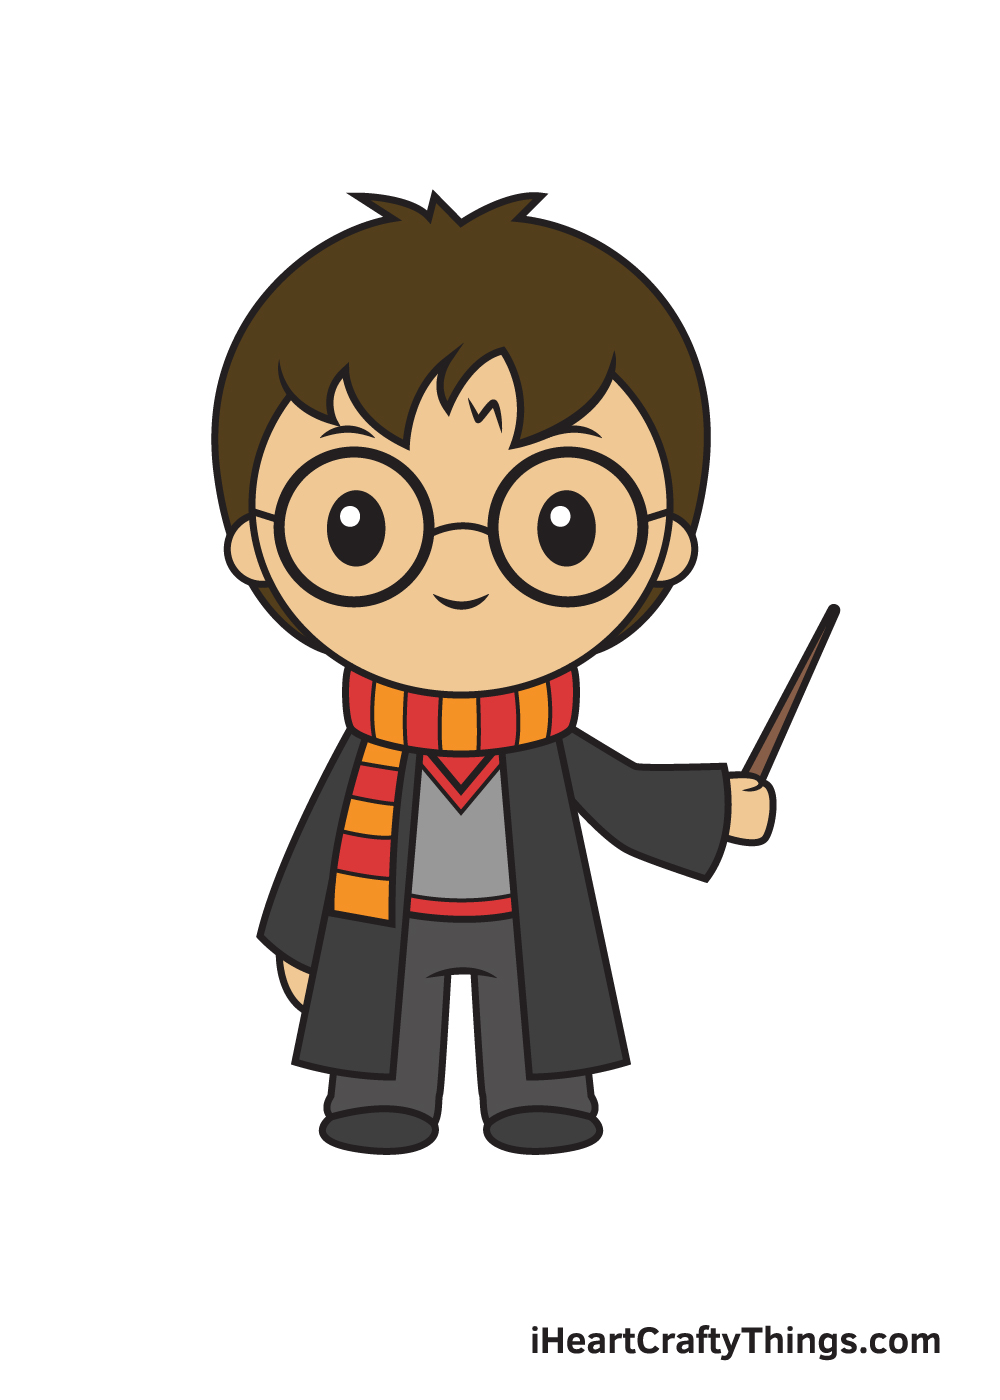

In [13]:
from io import BytesIO
import requests

image_path = r"https://iheartcraftythings.com/wp-content/uploads/2021/04/Harry-Potter-DRAWING-%E2%80%93-STEP-10.jpg"
response = requests.get(image_path)  # Changed variable name from 'image' to 'response'

# Open image from the response
image2 = Image.open(BytesIO(response.content))

# Display the image
display(image2)

In [14]:
client = genai.Client(api_key=config.apikey)
response = client.models.generate_content(
    model="gemini-2.0-flash-exp",
    contents=["What is this image?", image2])

print(response.text)

The image is a cartoon drawing of Harry Potter. He's wearing his signature round glasses, a Gryffindor scarf, and a Hogwarts robe, and he's holding a wand.



## Audio 

In [15]:
from IPython.display import Audio

# Replace 'your_file.mp3' with the actual path to your MP3 file
Audio("./noise.mp3", autoplay=True)


In [32]:
import os

# myfile = client.files.upload(path='noise.mp3')

with open('noise.mp3', 'rb') as f:
    image_bytes = f.read()

response = client.models.generate_content(
  model='gemini-2.0-flash',
  contents=[
    'Describe this audio clip',
    types.Part.from_bytes(
      data=image_bytes,
      mime_type='audio/mp3',
    )
  ]
)

print(response.text)

The audio clip appears to contain someone humming a tune. The humming includes "doo-doo-doo" sounds and some variations in melody.



In [35]:

response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents="Those 2 characters are from different franchises. One from Pokemon, the other from Harry potter. Do you remember what I asked you?.",
)

print(response.text)

Yes, I remember you asked me if I knew that the two characters you were referring to were from different franchises, one from Pokemon and the other from Harry Potter.



## PDF file input